
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [10]:
!pip install plotly matplotlib seaborn --quiet

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

# Set the renderer to 'notebook' if using Jupyter Notebook
pio.renderers.default = "plotly_mimetype+notebook"

In [2]:
medical_df = pd.read_csv("https://raw.githubusercontent.com/roldugina/Machine_learning_course/main/medical-charges.csv")

In [32]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
medical_df[medical_df['sex'] == 'female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [38]:
medical_df[medical_df['sex'] == 'male'].describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [37]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Ідеї щодо прогнозування колонки charges**

1. Виявити, які фактори впливають на цільову змінну - подивитись на матрицю кореляції, проаналізувати вплив категоріальних змінних.
1. Для кожної числової змінної, яка впливає на таргет, побудувати графік залежності таргета від цієї змінної.
1. Якщо є лінійна залежність, можна спробувати розрахувати її параметри. Наприклад, взяти середнє 5-10 мінімальних та 5-10 максимальних значень таргету, провести умовну лінію через ці 2 точки, і за їхніми координатами розрахувати параметри лінії.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

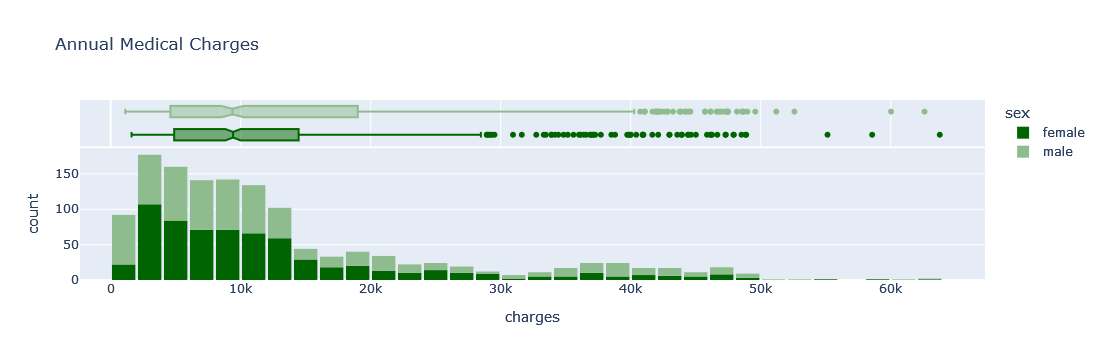

In [20]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['darkgreen','darkseagreen'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Висновки**

* Розподіл має правоскошений характер. Більшість значень сконцентровані на проміжку 2 000-12 000, є довгий хвіст до 64 000 з невеликим підвищенням в районі 34 000 - 38 000.
* Медіана 9 412 у жінок та 9 369 у чоловіків, тобто майже однакова. Значення 0.25 перцентилю приблизно однакове для чоловіків та жінок, а 0.75 перцентиль суттєво вищий у чоловіків (14 456 та 19 007 жінки / чоловіки). Взагалі витрати для чоловіків розсіяні значно сильніше (максимальне значення без урахування викидів у чоловіків значно вище.
* суму виплат 4 000 - 12 000 виплачує приблизно однакова кількість чоловіків та жінок, в структурі виплат вище ніж 20 000 більшість складають чоловіки.

In [30]:
# Select 4 colors from the Viridis palette
viridis_colors = px.colors.sequential.Viridis
selected_colors = [viridis_colors[0], viridis_colors[2], viridis_colors[5], viridis_colors[8]]
print(selected_colors)

['#440154', '#3e4989', '#1f9e89', '#b5de2b']


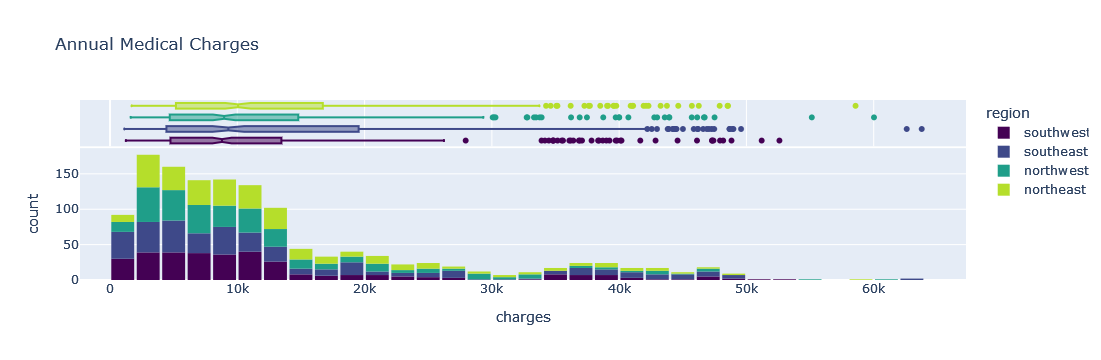

In [31]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=selected_colors,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [6]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [7]:
def estimate_charges(age, w, b):
    return w * age + b

In [8]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?